In [1]:
# Calculations of accretion rates for Bondi-Hoyle-Lyttleton (BHL) 
# accretion model used in reference papaer M. Ricotti et al. 
# https://arxiv.org/abs/0709.0524 and Park Ricotti Model (PR)
# accretion model as per F. Scarcella et al. 2020, 
# https://arxiv.org/abs/2012.10421 . 


# Here, the value of the speed of sound in the ioinized region of 
# PR Model is chosen as c_s,in = 25 c_s. c_s,in is the free parameter 
# of PR accretion Model.


# The values of v_pbh, c_s and v_eff are used as per 
# M. Ricotti et al. 2007 https://arxiv.org/abs/0709.0524
 

# Here,  v_eff = v_eff,A as mentioned in
# M. Ricotti et al. 2007 https://arxiv.org/abs/0709.0524



from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from PRaccretion import*
from sympy import Symbol, nsolve
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


def c_s(z):
    return c_s_Ricotti(z)

def v_pbh(z):
    return v_rel_digitized_Ricotti(z)

def v_eff(z):
    return v_effA_Ricotti(z)

def x_e(z):
    if z < z_rec:
        return e_fraction
    else:
        return 1
    

    
# BHL accretion Model around isolated PBHs 
def r_B_pbh(z, m):
    return (G * m)/(v_eff(z)**2)

 
# BHL accretion Model in the presence of DM halos around isolated PBHs  
def r_ta(z, m):
    if DM_densityprofile94 == True:
        return r_ta94(z, m)
    else:
        return r_ta32(z, m)

    
def M_halo(z, m):
    if DM_densityprofile94 == True:
        return M_halo94(z, m)
    else:
        return M_halo32(z, m)

    
def r_B_halo(z, m):
    return  (G * M_halo(z, m))/(v_eff(z)**2)



def potential_pbh(z, m, r_B_eff):
    return -(G * m)/r_B_eff

def potential_halo(z, m, r_B_eff):
    if r_B_eff >= r_ta(z, m):
        return -(G * M_halo(z, m))/r_B_eff
    else:
        return -((G * M_halo(z, m))/r_B_eff)* (1/(1-p)) * (((r_B_eff/r_ta(z, m))**p) - p * (r_B_eff/r_ta(z, m)))
      
        
def r_B_eff_eq(z, m, r_B_eff):
    return -(potential_pbh(z, m, r_B_eff) + potential_halo(z, m, r_B_eff))




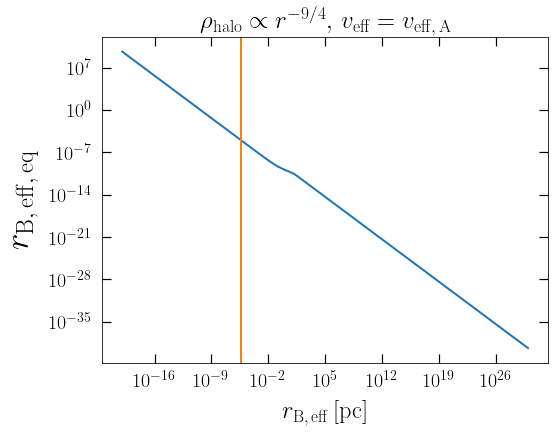

In [2]:
DM_densityprofile94 = True
alpha = 9/4
p = 3 - alpha


z = 104.76
m = 1e4



colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (8, 6))
plt.rc('lines', linewidth = 2)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


r_B_eff_arr = np.geomspace(1e-20, 1e30, 100)
 


r_B_eff_eq_arr = np.zeros(len(r_B_eff_arr))


for i, r_B_eff in enumerate(r_B_eff_arr):
    r_B_eff_eq_arr[i] = r_B_eff_eq(z, m, r_B_eff)
ax.loglog(r_B_eff_arr, r_B_eff_eq_arr)
v_eff_var = v_eff(z)
plt.axvline( x = v_eff_var, color = 'C1')

    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)



plt.xlabel('$r_\mathrm{B,\, eff}\, \mathrm{[pc]}$', fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$r_\mathrm{B,\, eff, \,eq}$', fontsize = 35, labelpad = 11)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.title(r'$\rho_\mathrm{halo} \propto r^{-9/4}, \, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('r_B_eff_eq_94.pdf', bbox_inches = 'tight')
plt.show()